# Experimenting with ML Model Parameters

## 📚 Learning Objectives

By completing this notebook, you will:
- Experiment with changes in ML model parameters
- Observe changes in model fit to training data
- Understand the impact of parameter changes on model behavior
- Connect linear algebra concepts to ML model optimization

## 🔗 Prerequisites

- ✅ Understanding of linear algebra and vectors
- ✅ Basic understanding of machine learning models
- ✅ Python and NumPy knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 1**:
- Experimenting with changes in ML model parameters and observing changes in model fit
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 1 Practical Content

---

## Introduction

**Model parameters** can be viewed as vectors in parameter space. Changes to these parameters directly affect how well the model fits the training data. Understanding this relationship is fundamental to machine learning optimization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print("✅ Libraries imported!")
print("\nExperimenting with ML Model Parameters")
print("=" * 60)

✅ Libraries imported!

Experimenting with ML Model Parameters


## Part 1: Linear Regression Parameter Experiments


In [2]:
print("=" * 60)
print("Part 1: Linear Regression Parameter Experiments")
print("=" * 60)

# Create sample dataset
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + 0.5 * np.random.randn(n_samples)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Train baseline model
model_baseline = LinearRegression()
model_baseline.fit(X_train, y_train)

print(f"\nBaseline Model Parameters (weights):")
print(f"Coefficients: {model_baseline.coef_}")
print(f"Intercept: {model_baseline.intercept_:.4f}")

# Evaluate
y_pred_baseline = model_baseline.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"\nBaseline Performance:")
print(f"MSE: {mse_baseline:.4f}")
print(f"R²: {r2_baseline:.4f}")

Part 1: Linear Regression Parameter Experiments

Training samples: 80
Test samples: 20

Baseline Model Parameters (weights):
Coefficients: [2.1028185  2.91345033]
Intercept: 0.0617

Baseline Performance:
MSE: 0.1505
R²: 0.9893


In [3]:
# Experiment: Modify parameters manually
print("\n" + "=" * 60)
print("Experiment: Modifying Parameters Manually")
print("=" * 60)

baseline_params = np.concatenate([model_baseline.coef_, [model_baseline.intercept_]])

# Create modified models with different parameter vectors
params_scaled_05 = baseline_params * 0.5
params_scaled_15 = baseline_params * 1.5
params_noise = baseline_params + 0.1 * np.random.randn(len(baseline_params))

def evaluate_params(X, y, params):
    """Evaluate model with given parameters"""
    coef = params[:-1]
    intercept = params[-1]
    y_pred = X @ coef + intercept
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

print("\nParameter Modifications:")
for name, params in [("Baseline", baseline_params),
                      ("Scaled 0.5x", params_scaled_05),
                      ("Scaled 1.5x", params_scaled_15),
                      ("With noise", params_noise)]:
    mse, r2 = evaluate_params(X_test, y_test, params)
    print(f"\n{name}:")
    print(f"  Parameters: {params}")
    print(f"  MSE: {mse:.4f}, R²: {r2:.4f}")


Experiment: Modifying Parameters Manually

Parameter Modifications:

Baseline:
  Parameters: [2.1028185  2.91345033 0.06171007]
  MSE: 0.1505, R²: 0.9893

Scaled 0.5x:
  Parameters: [1.05140925 1.45672517 0.03085503]
  MSE: 3.6355, R²: 0.7406

Scaled 1.5x:
  Parameters: [3.15422775 4.3701755  0.0925651 ]
  MSE: 3.7294, R²: 0.7339

With noise:
  Parameters: [2.019919   2.85743223 0.13643943]
  MSE: 0.1750, R²: 0.9875


## Part 2: Regularization Parameter Experiments



Part 2: Regularization Parameter Experiments

Regularization Effects on Parameters:
  Alpha  0.001: MSE=0.1505, R²=0.9893, ||θ||=3.5930
  Alpha  0.010: MSE=0.1505, R²=0.9893, ||θ||=3.5925
  Alpha  0.100: MSE=0.1503, R²=0.9893, ||θ||=3.5879
  Alpha  1.000: MSE=0.1516, R²=0.9892, ||θ||=3.5420
  Alpha 10.000: MSE=0.3552, R²=0.9747, ||θ||=3.1413
  Alpha 100.000: MSE=4.9170, R²=0.6492, ||θ||=1.4849


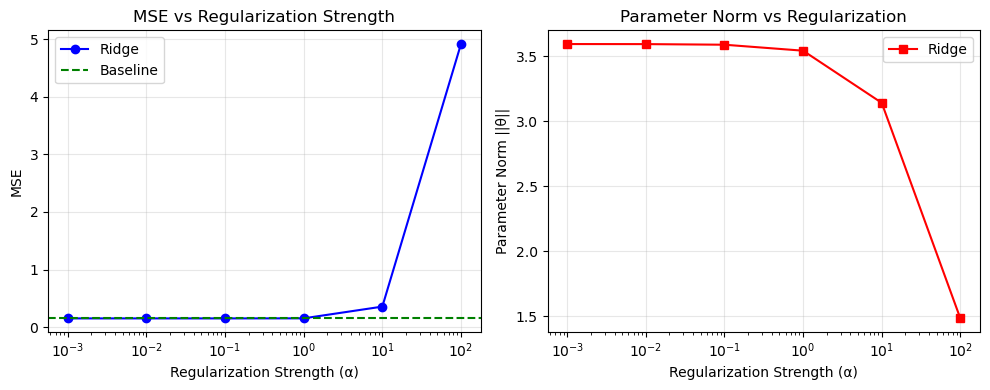


✅ Regularization parameter effects visualized!


In [4]:
print("\n" + "=" * 60)
print("Part 2: Regularization Parameter Experiments")
print("=" * 60)

# Experiment with different regularization strengths
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

ridge_results = []
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, ridge_pred)
    r2 = r2_score(y_test, ridge_pred)
    param_norm = np.linalg.norm(ridge.coef_)
    ridge_results.append({'alpha': alpha, 'mse': mse, 'r2': r2, 'param_norm': param_norm})

print("\nRegularization Effects on Parameters:")
for r in ridge_results:
    print(f"  Alpha {r['alpha']:6.3f}: MSE={r['mse']:.4f}, R²={r['r2']:.4f}, ||θ||={r['param_norm']:.4f}")

# Visualize
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
alphas = [r['alpha'] for r in ridge_results]
mses = [r['mse'] for r in ridge_results]
plt.semilogx(alphas, mses, 'b-o', label='Ridge')
plt.axhline(y=mse_baseline, color='g', linestyle='--', label='Baseline')
plt.xlabel('Regularization Strength (α)')
plt.ylabel('MSE')
plt.title('MSE vs Regularization Strength')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
norms = [r['param_norm'] for r in ridge_results]
plt.semilogx(alphas, norms, 'r-s', label='Ridge')
plt.xlabel('Regularization Strength (α)')
plt.ylabel('Parameter Norm ||θ||')
plt.title('Parameter Norm vs Regularization')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Regularization parameter effects visualized!")

## Summary

### Key Concepts:
1. **Parameters as Vectors**: Model parameters can be viewed as vectors in parameter space
2. **Parameter Space**: Different parameter values create different model fits
3. **Regularization**: Constrains parameter values to prevent overfitting
4. **Optimization**: Finding optimal parameters minimizes the loss

### Best Practices:
- Visualize parameter space to understand model behavior
- Experiment with different parameter values to see their effects
- Use regularization to constrain parameter space
- Monitor both training and test performance

### Applications:
- Model optimization
- Hyperparameter tuning
- Understanding model behavior
- Regularization selection

**Reference:** Course 03, Unit 1: "Linear Algebra for Machine Learning" - Experimenting with ML model parameters practical content